<a href="https://colab.research.google.com/github/theophilusawe/learning-pytorch/blob/main/PTD1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Day 1 of Learning PyTorch
 - Initialization of Weights
 - Getting input data
 - Calulating Error
 - Calculating derivates
 - Updating weights using gradient descent
 - Repetition until complete iteration or insignificant error

In [2]:
import numpy as np

In [71]:
def calc_error_mse(y, y_pred):
  return np.mean((y-y_pred)**2)

class LinearRegression:

  # Initializing the parameters
  def __init__(self, lr=0.001, iterations=2000):
    self.lr = lr
    self.iterations = iterations
    self.weights = None
    self.bias = None


  def fit(self, X, y):
    N, n_features = X.shape
    np.random.seed(20)
    self.weights = np.random.rand(n_features)
    self.bias = np.random.rand(1)

    # Gradient descent iterations
    for iter_epoch in range(self.iterations):
      y_pred = np.dot(X, self.weights) + self.bias

      if iter_epoch % 500 == 0:
        print(f'Epoch: {iter_epoch}, Error: {calc_error_mse(y, y_pred)}')

      # Calculating the derivatives
      dw = (1/N) * np.dot((2*X).T, (y_pred - y))
      db = (1/N) * np.sum(y_pred - y)

      # Updating the weights and the biases
      self.weights = self.weights - self.lr * dw
      self.bias = self.bias - self.lr * db

  def predict(self, X):
    return np.dot(X, self.weights) + self.bias


  def score(self, y_test, y_pred):
    return calc_error_mse(y_test, y_pred)






In [86]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=10000, n_features=1, random_state=42, noise=20)
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.3, random_state=42)

linreg = LinearRegression(iterations=2500, lr=0.001)
linreg.fit(X_train, y_train)
print(f'\nWeights: {linreg.weights} \n' + f'\nBias: {linreg.bias}\n\n')

test_element = 112

y_pred = linreg.predict(X_test)
model_error = linreg.score(y_test[test_element], y_pred[test_element])
print("The error at {}th is {}".format(test_element, model_error))

Epoch: 0, Error: 1390.8556649790924
Epoch: 500, Error: 533.4185143677819
Epoch: 1000, Error: 421.99859932890945
Epoch: 1500, Error: 407.5156883920808
Epoch: 2000, Error: 405.6315037600035

Weights: [31.48914942] 

Bias: [0.52809064]


The error at 112th is 0.03964358531780519


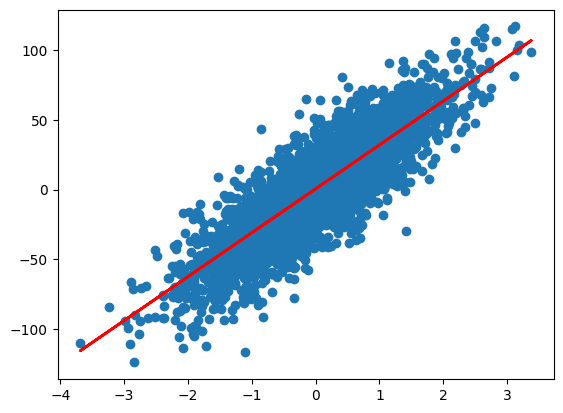

In [87]:
import matplotlib.pyplot as plt

plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.scatter(X_test, y_test)
